# Problem 
Loan Prediction Problem

Classification Problem, here I try to predict whether loan should be approved or not

# Trying to show application of Neural Network on this dataset
* `Applying a Sequential NN using Keras`
* `Evaluate model performance`

# Approaching Problem steps:
1. Will Pre-process the data: impute the missing values, normalize the variables... 
2. Will Define the architecture of your model 
3. Since it is a regression problem, will make sure to use the 'linear' activation function in the output layer 
4. Train model 
5. Will perform the same pre-processing steps on test set as, did for the training set 
6. Generate predictions for the test set using the trained model 
7. Save the predictions in a csv file (to check the format, refer to the sample submission file provided on the problem page) 
8. Submit predictions on the problem page and check your rank on the leaderboard if any


In [1]:
import numpy as np 
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# ! pip install pandas-profiling

In [6]:
# import pandas_profiling

# train_report = pandas_profiling.ProfileReport(train_df)
# train_report

# 1.Pre-Processing
* `Missing Value Treatment`:
    * if Categorical Variables
        * fill By Mode
    * if Numerical Variables 
        * fill By Mean/Median
        
        
* `Convert Categories to Number`:
    * OneHot Encoding
    * Label Encoding


* `Scaling(bring all var to same scale [generally b/w 0 to 1])`:
    * Min-Max Scaler
        * Helps in reducing time complexity
        * NN converges fast


# 1.1.Missing Value Treatment

In [7]:
train_df['Gender'].mode()[0]

'Male'

In [8]:
# For All Categorical Data

train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)

train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)

train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)

train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [9]:
# For All Categorical  Test Data

test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)

test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)

test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)

test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)

test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)

test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

In [10]:
# For Continious data
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)

In [11]:
# For Continious Test data
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

In [12]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 1.2.Converting Categories to Numbers

In [13]:
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['Married'] = train_df['Married'].map({'No': 0, 'Yes': 1})
train_df['Dependents'] = train_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
train_df['Education'] = train_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'No': 0, 'Yes': 1})
train_df['Property_Area'] = train_df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N': 0, 'Y': 1})

In [14]:
test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['Married'] = test_df['Married'].map({'No': 0, 'Yes': 1})
test_df['Dependents'] = test_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
test_df['Education'] = test_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'No': 0, 'Yes': 1})
test_df['Property_Area'] = test_df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
# test_df['Loan_Status'] = test_df['Loan_Status'].map({'N': 0, 'Y': 1})

# 1.3.Scaling

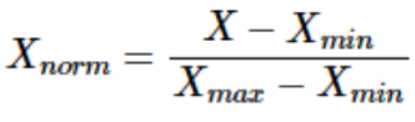

In [15]:
# Not scaled single column
train_df.Dependents.head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [16]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [17]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(test)

In [18]:
# applying for loop to bring all the variables in range 0 to 1
for i in  train_df.columns[1:]:
    train_df[i] = (train_df[i] - train_df[i].min()) / (train_df[i].max() - train_df[i].min())

In [19]:
# Scaled single column
train_df.Dependents.head()

0    0.000000
1    0.333333
2    0.000000
3    0.000000
4    0.000000
Name: Dependents, dtype: float64

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.5+ KB


`Results:`
* We have done pre-processing
* `Now every data point is in range of 0 to 1 and  no categories along with null values`

In [21]:
# removing the loan_ID since these are just the unique values
train_df = train_df.drop('Loan_ID', axis=1)

# Steps to build a Neural Network using Keras

1. Loading the dataset. 
2. Creating training and validation set
3. Defining architecture of the model
    * How many `input neurons` we want
    * How many `hidden layers` and `hidden neurons` should be there
    * What would be the `number of neurons` in the Output layer
* All above points will be defined while make architecture of the model
4. Compiling the model (defining loss function, optimizer)
    * `Define Loss Function`
    * `Define Optimizers`

Keras Framework have pre-written code for different Loss Functions like:<br>
* `MSE`
* `Binary Cross Entropy`…. <br>

It also supports diff optimizers like: <br>
* `SGD`
* `RMSprop`
* `Adam`

5. Training the model
    * While training model `define Epochs`
6. Evaluating model performance on training and validation set

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [23]:
X = train_df.drop('Loan_Status',axis=1)

y = train_df.Loan_Status

X.shape, y.shape

((614, 11), (614,))

# Creating Training and Validation set
* Stratify will make sure that the distribution of classes in train and validation set is similar
* Test size 0.2 will keep 20% data in validation and remaining 80% in train set

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((491, 11), (123, 11), (491,), (123,))

# Defining Architecture of the Model

In [25]:
import tensorflow
import keras

print(tensorflow.__version__)
print(keras.__version__)

2.10.0
2.10.0


* `Keras` is a library based on `Tensorflow`

# 1.Create Model
`Computation graph for the Forward Propogation of a Neural Network looks like below graph:`

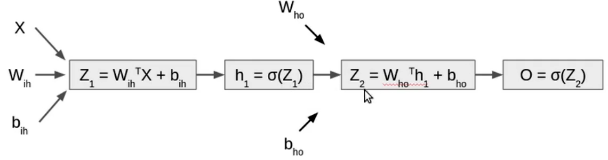

**`Flow`**
* First `taking input(X)`, multiplying it with `Weight Matrix(W)`, add `Bias (b)` to that
* then applying `Activation Function(sigmoid above)` to calculate hiddent layer activation
* next layer (3rd) have its own W and b
* similarly generate final output

As all these steps are being done in `Sequential` manner so `I am creating a Sequential Model here` to create a NN <br>

We also have `Functional Model` in Keras I will work on that in next notebook

In [26]:
# importing sequential model for now

from keras.models import Sequential

# 2.Defining different Layers (Architecture)
We have 3 type of different layer in NN
* `Input Layer` => equall to number of Features
* Dense Layer => these layer are for defining Hidden and Output Layer
    * `Hiddent Layer`
    * `Output Layer` => depends on number of output here Y or N(0or1) so 1output since this is (Binary Classification Problem)

In [27]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 


# deciding number of input neurons
print(f'Shape of df: {X_train.shape}')
# number of features in data
print(f'Number of Features in data: {X_train.shape[1]}')

###################################
###################################

# defining input neurons
input_neurons = X_train.shape[1]
print(f'Number of Input Neurons: {input_neurons}')

# define hidden layers and hidden neuron in each layer (hyperparameters)
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# define number of output neurons
output_neurons = 1

Shape of df: (491, 11)
Number of Features in data: 11
Number of Input Neurons: 11


### Number of output neurons
* As loan prediction is a Binary Classification Problem
* We will have `Single Neuron in Output Layer`

### Number of hidden layers and hidden neurons

* It is a hyperparameter
* We can pick `Hidden Layers` and `Hidden Neurons` on our own

### Activation Function of different layers
* For now `Relu` is picked as an activation function for hidden layers
* Using `Sigmoid Activation function` in final layer, as this is binary classification problem

# 3.Model Architecture

In [28]:
# defining the architecture of the model  again at one place

model = Sequential()
model.add(InputLayer(input_shape = (input_neurons,))) # adding layes

model.add(Dense(units = neuron_hidden_layer_1,activation='relu')) # set number of neurons using units
model.add(Dense(units = neuron_hidden_layer_2,activation='relu'))

model.add(Dense(units = output_neurons,activation='sigmoid'))

In [29]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


`Observation:`
* Input layer is not shown in above summary
* 3-Layer are shown (dense,dense_1,dense_2)
    * last one is output
    * rest are dense layer
* `Param #` number of parameters which can be trained => these are the `Weights` learned suring training process

**`In first we have 120 param what!! how come ??`** apart from weight we have biases associated with each neurons 

In [30]:
# Number of parameters between input and first hidden layer, adding the bias for each neuron of first hidden layer

input_neurons * neuron_hidden_layer_1 + 10  # 11 * 10 + 10

120

*  `input layer * first hidden layer + bias(output shape)`

In [31]:
# Number of parameters between first and second hidden layer

neuron_hidden_layer_1 * neuron_hidden_layer_2 + 5   

55

*  `hidden_layer_1 * hidden_layer_2 + bias(output shape)`

In [32]:
# Number of parameters between second hidden and output layer

neuron_hidden_layer_2 * output_neurons + 1

6

# 4. Compiling Model (defining loss function, optimizer)
This is a Binary Classification problem

* Choos loss as `binary_crossentropy`
* Optemizer as `Adam`
* Evaluation Metric as `accuracy`

In [33]:
# loss as 'binary_crossentropy', as binart Classification Problem

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# 5.Training Model
* Passing independent and dependent features for training set for training model
* Validation data will be evaluated at end of each `epoch`
* Setting `epochs=45`
* storing trained model in model_history variable which will be used to visualize training process

In [34]:
y_test=y_test.astype('int32')

In [35]:
y_test

22     0
604    1
181    0
85     1
391    1
      ..
582    1
316    1
449    0
224    1
90     1
Name: Loan_Status, Length: 123, dtype: int32

In [36]:
y_train=y_train.astype('int32')

In [37]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,0.0,1.0,0.000000,0.0,0.0,0.030303,0.045864,0.154848,0.74359,0.0,0.5
604,1.0,1.0,0.333333,1.0,0.0,0.146568,0.000000,0.704776,0.74359,1.0,0.5
181,0.0,0.0,0.000000,1.0,0.0,0.021843,0.121511,0.083936,0.74359,1.0,0.0
85,0.0,0.0,0.000000,1.0,0.0,0.027409,0.060744,0.183792,0.74359,1.0,0.5
391,0.0,1.0,1.000000,1.0,0.0,0.115696,0.000000,0.384949,0.74359,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
582,1.0,1.0,0.000000,1.0,0.0,0.037304,0.000000,0.039074,0.74359,1.0,0.5
316,0.0,1.0,0.666667,1.0,0.0,0.044119,0.000000,0.160637,0.74359,1.0,0.5
449,0.0,0.0,0.333333,0.0,1.0,0.032393,0.037008,0.261939,0.74359,1.0,0.5
224,0.0,1.0,0.000000,1.0,0.0,0.075448,0.000000,0.172214,0.74359,1.0,0.5


In [38]:
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=45)


Epoch 1/45
16/16 [==============================] - 2s 38ms/step - loss: 0.6008 - accuracy: 0.6925 - val_loss: 0.5982 - val_accuracy: 0.6911
Epoch 2/45
16/16 [==============================] - 0s 9ms/step - loss: 0.5918 - accuracy: 0.6904 - val_loss: 0.5868 - val_accuracy: 0.6911
Epoch 3/45
16/16 [==============================] - 0s 9ms/step - loss: 0.5840 - accuracy: 0.6925 - val_loss: 0.5806 - val_accuracy: 0.6911
Epoch 4/45
16/16 [==============================] - 0s 7ms/step - loss: 0.5785 - accuracy: 0.6965 - val_loss: 0.5762 - val_accuracy: 0.6911
Epoch 5/45
16/16 [==============================] - 0s 8ms/step - loss: 0.5724 - accuracy: 0.7088 - val_loss: 0.5683 - val_accuracy: 0.6911
Epoch 6/45
16/16 [==============================] - 0s 11ms/step - loss: 0.5673 - accuracy: 0.7088 - val_loss: 0.5629 - val_accuracy: 0.6992
Epoch 7/45
16/16 [==============================] - 0s 8ms/step - loss: 0.5620 - accuracy: 0.7108 - val_loss: 0.5562 - val_accuracy: 0.7073
Epoch 8/45
16/16 [

# 6.Evaluating ModelPerformance on Validation Set


In [39]:
# Getting predictions for validation set
prediction = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [40]:
# calculating accuracy on validation set
accuracy_score(y_test,prediction)

0.8373983739837398

In [41]:
prediction.shape

(123, 1)

In [42]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(y_test, prediction))
print(recall_score(y_test, prediction)) 
print(f1_score(y_test,prediction))

0.8095238095238095
1.0
0.8947368421052632


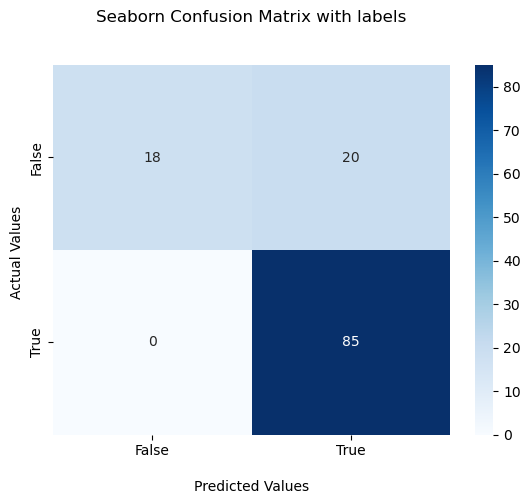

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)

# print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123



# Visualizing Model Performance
As I have saved the model performance as epoch increase in model_history so I will plot it from there

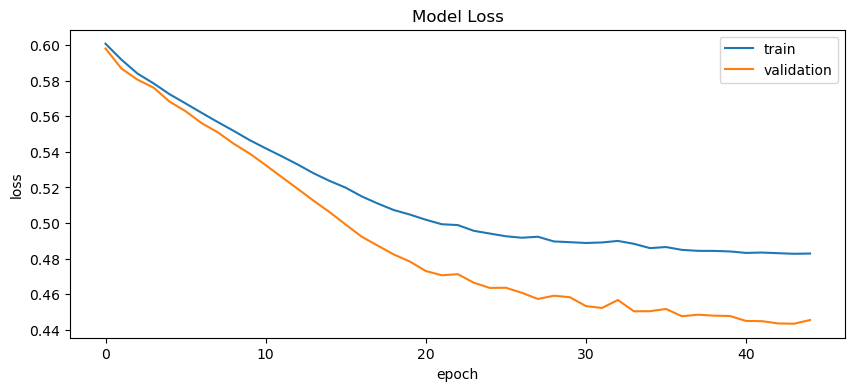

In [45]:
# summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

`Observation:`
training and validation loss is decreasing as the epoch are increasing

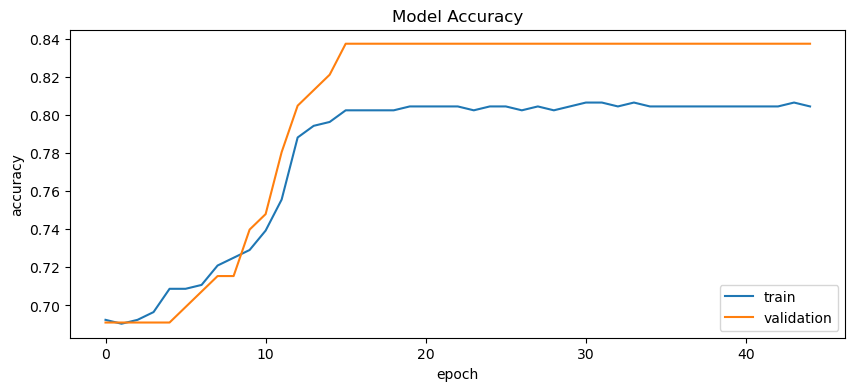

In [46]:
# summarize history for accuracy

plt.figure(figsize=(10,4))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='lower right')
plt.show()

In [47]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,0.0,1.0,0.000000,0.0,0.0,0.030303,0.045864,0.154848,0.74359,0.0,0.5
604,1.0,1.0,0.333333,1.0,0.0,0.146568,0.000000,0.704776,0.74359,1.0,0.5
181,0.0,0.0,0.000000,1.0,0.0,0.021843,0.121511,0.083936,0.74359,1.0,0.0
85,0.0,0.0,0.000000,1.0,0.0,0.027409,0.060744,0.183792,0.74359,1.0,0.5
391,0.0,1.0,1.000000,1.0,0.0,0.115696,0.000000,0.384949,0.74359,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
582,1.0,1.0,0.000000,1.0,0.0,0.037304,0.000000,0.039074,0.74359,1.0,0.5
316,0.0,1.0,0.666667,1.0,0.0,0.044119,0.000000,0.160637,0.74359,1.0,0.5
449,0.0,0.0,0.333333,0.0,1.0,0.032393,0.037008,0.261939,0.74359,1.0,0.5
224,0.0,1.0,0.000000,1.0,0.0,0.075448,0.000000,0.172214,0.74359,1.0,0.5


In [48]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,3,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [49]:
test=test_df.drop(columns=['Loan_ID'])
# applying for loop to bring all the variables in range 0 to 1
for i in  test.columns:
    test[i] = (test[i] - test[i].min()) / (test[i].max() - test[i].min())

In [51]:
# test.drop(columns='Loan_Status',inplace=True)

In [52]:
pred = (model.predict(test) > 0.5).astype("int32")

12/12 [==============================] - 0s 3ms/step


In [53]:
pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [54]:
test_df['Loan_Status']=pred

In [55]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,3,0,1,4009,1777,113.0,360.0,1.0,2,1
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0,2,1
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1,1
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0,1


In [56]:


test_df['Loan_Status']=test_df.Loan_Status.map({1:'Y',0:'N'})
test_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2,Y
